In [12]:
import pandas as pd

In [11]:
def solution_data_normalization(u,X,t):
    data_dict={
        "u":u,
        "x":X[0],
        "y":X[1],
        "z":X[2],
        "t":t if t!=None else [None for _ in X[0]]
    }
    return pd.DataFrame(data_dict)
        
    

# Dirichlet constant F

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=1+x^2+2y^2$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [1]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

In [2]:
from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: 1 + x[0]**2 + 2 * x[1]**2)

In [3]:
import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

In [4]:
import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

In [5]:
from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

In [6]:
from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [7]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


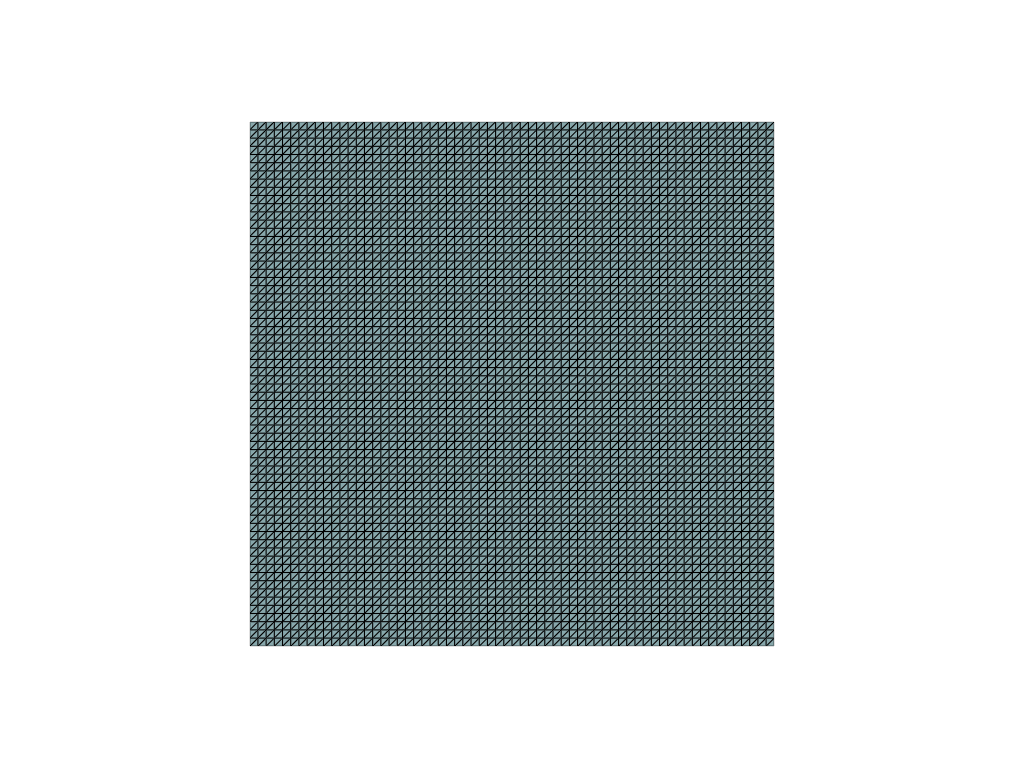

In [8]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


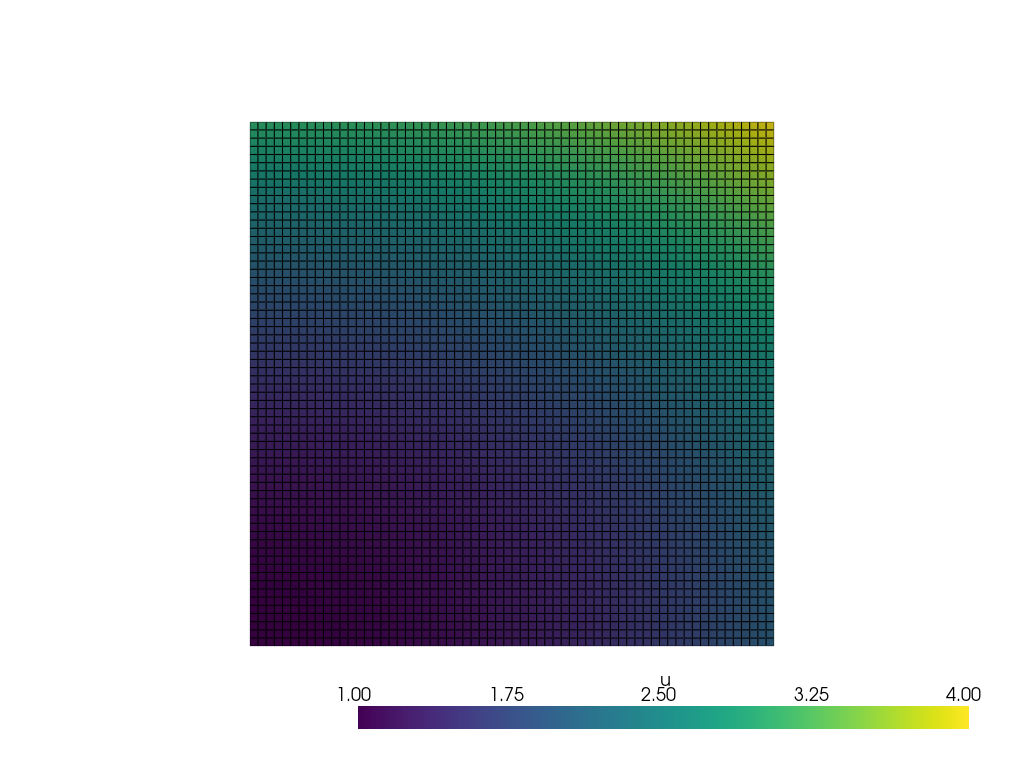

In [9]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [44]:
geometry.T[0].shape

(289,)

In [13]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [54]:
!ls ../Data

In [14]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_BC_64x64.csv")

# Dirichlet F linear-Constant

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=x$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [37]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: x[0])

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [38]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


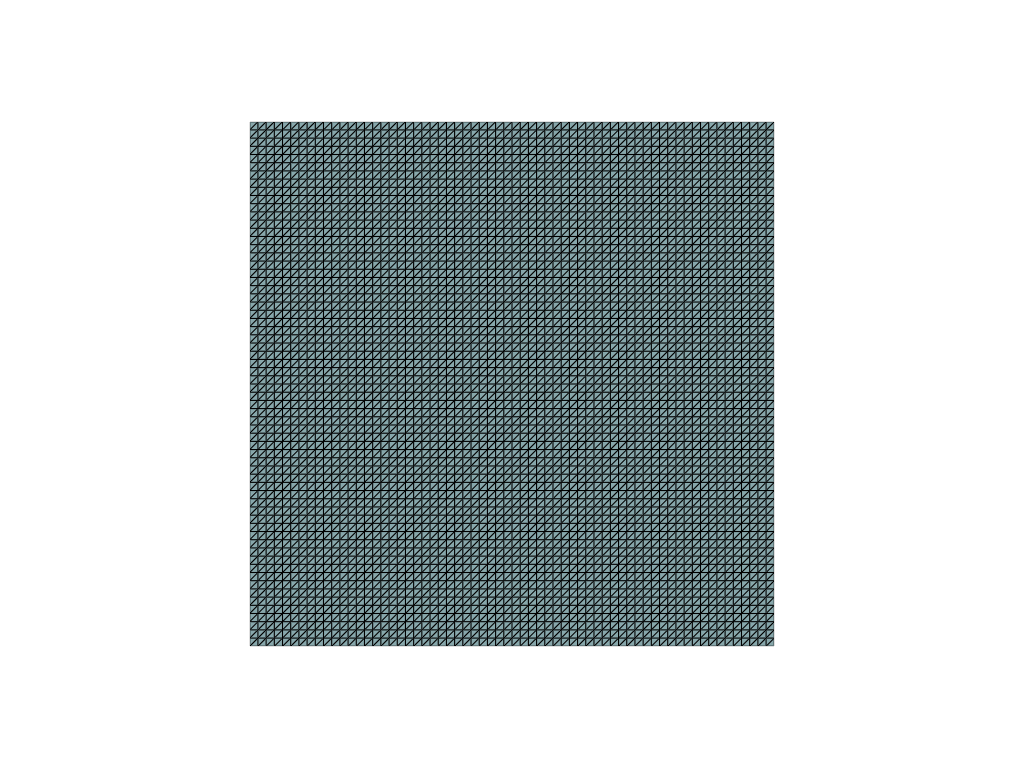

In [39]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


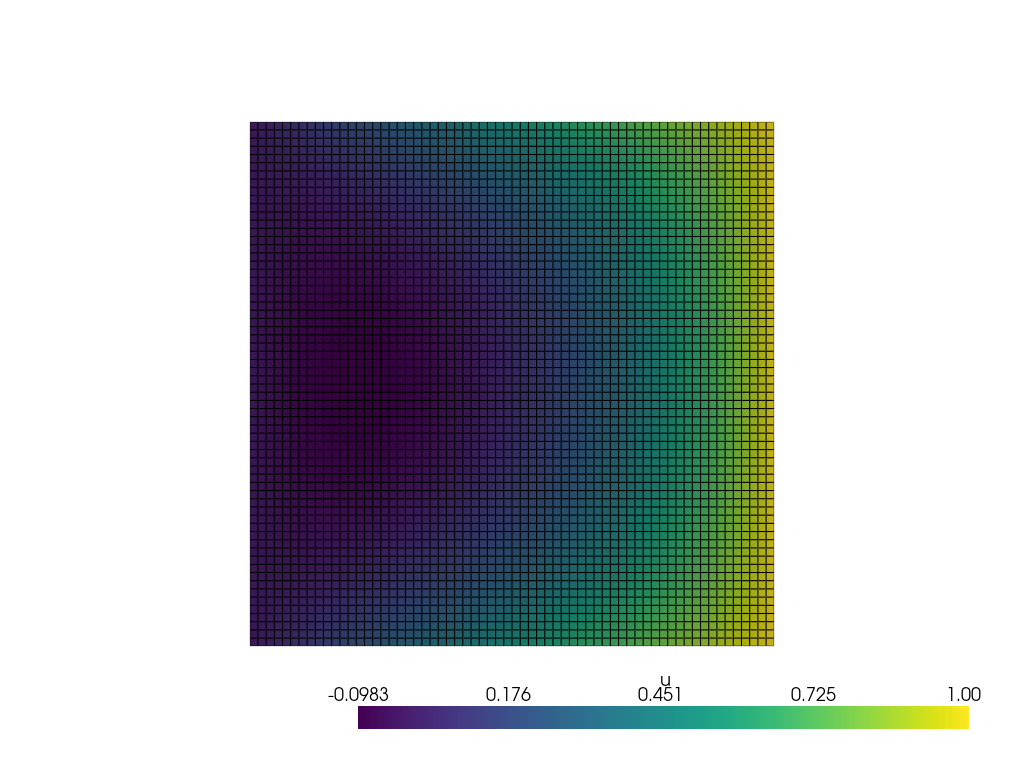

In [40]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [41]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [42]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Const_Linear_f_Const_64x64.csv")

# Dirichlet F Linear-Linear

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=1+x+2y$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [25]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

In [26]:
from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: 1 + x[0] + 2 * x[1])

In [27]:
import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

In [28]:
import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

In [29]:
from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

In [30]:
from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [31]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


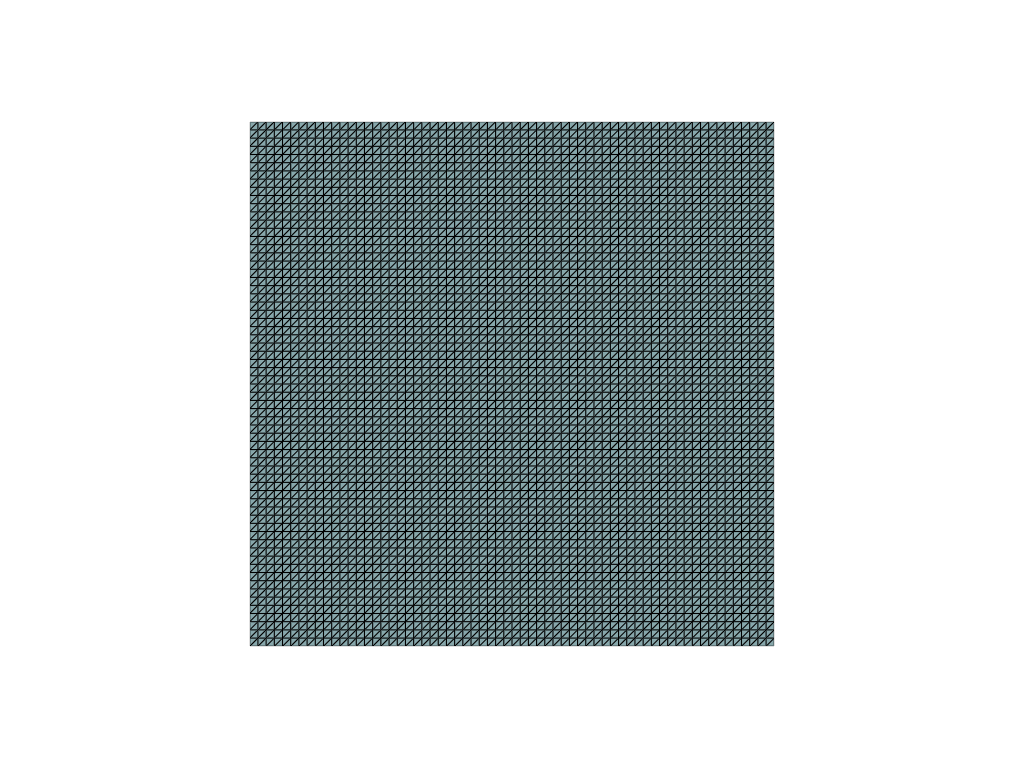

In [32]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


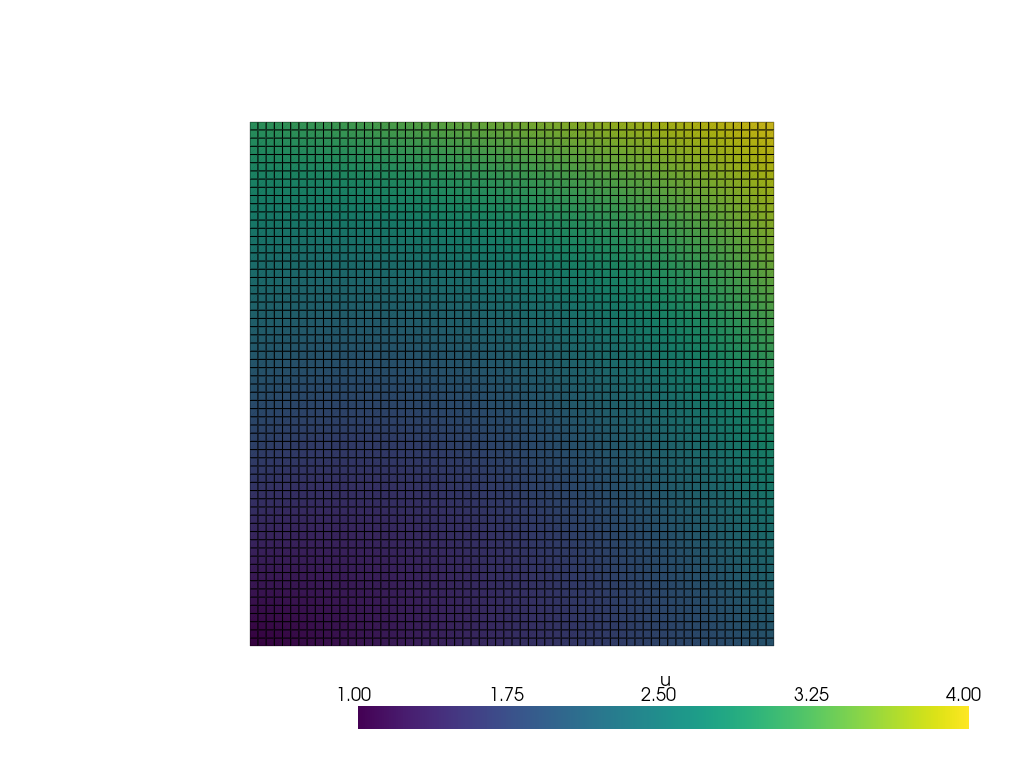

In [33]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [34]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [36]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Linear_Linear_f_Const_64x64.csv")

# Dirichlet F Quadratic-Constant

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=y^2+6$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [57]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: 6+(0.5-x[1])**2)

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [58]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


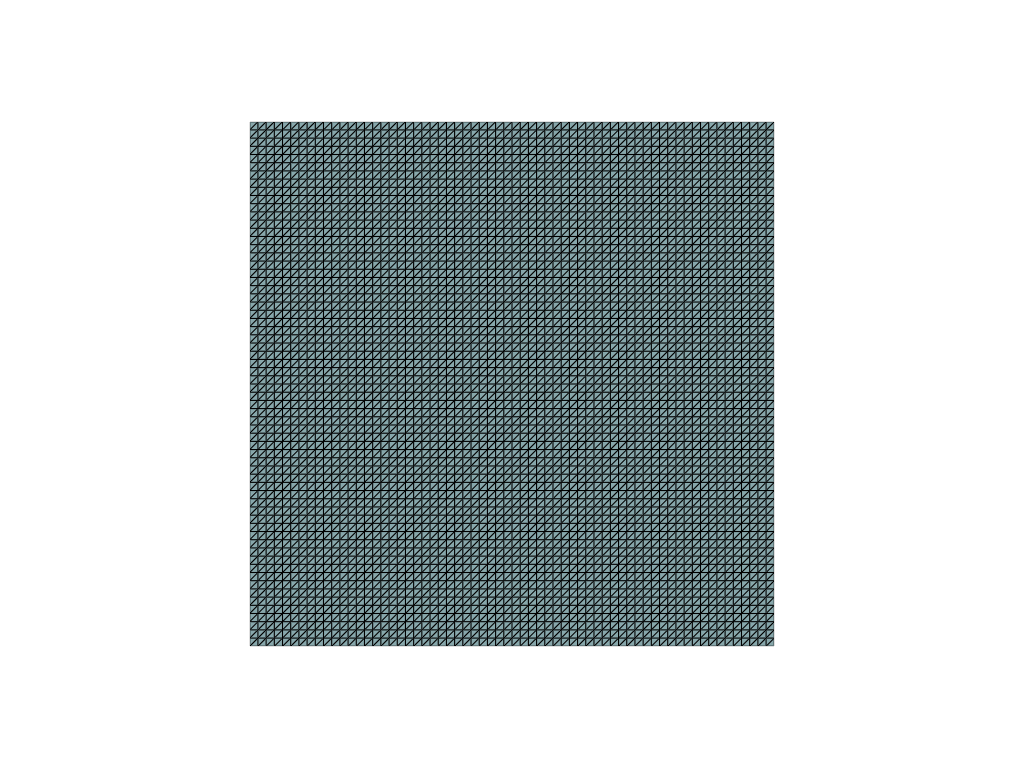

In [59]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


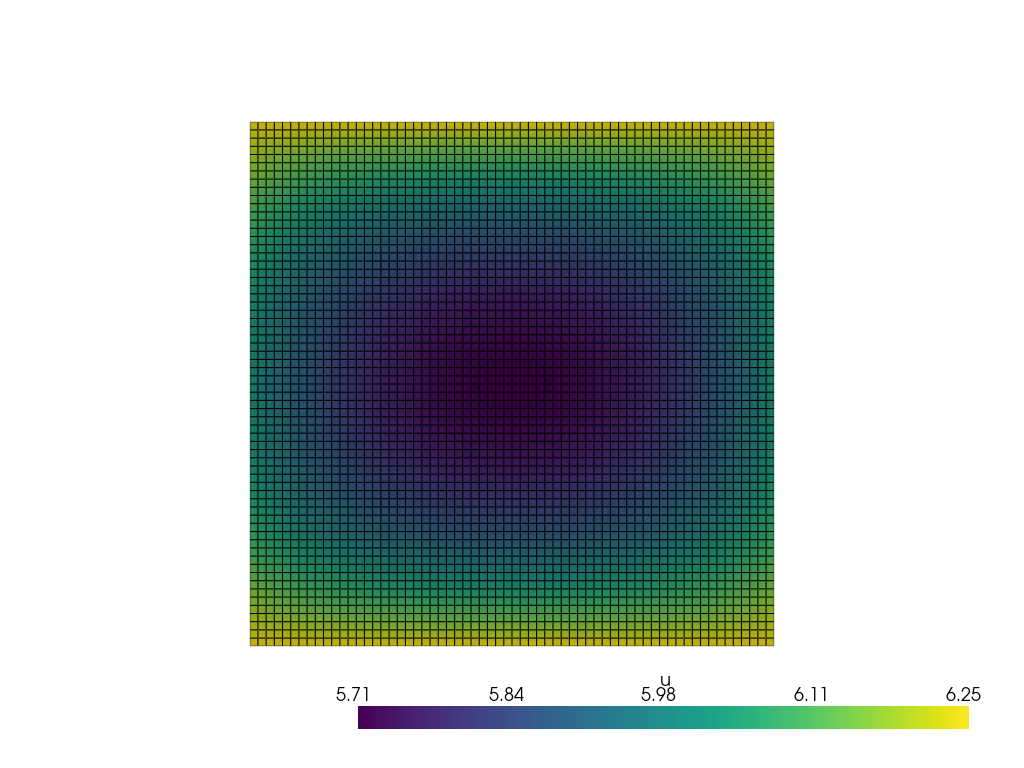

In [60]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [61]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [62]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Const_Quad_f_Const_64x64.csv")

# Dirichlet F linear-Quadratic

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=x+y^2$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [67]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: x[0]+(x[1]-0.5)**2)

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [68]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


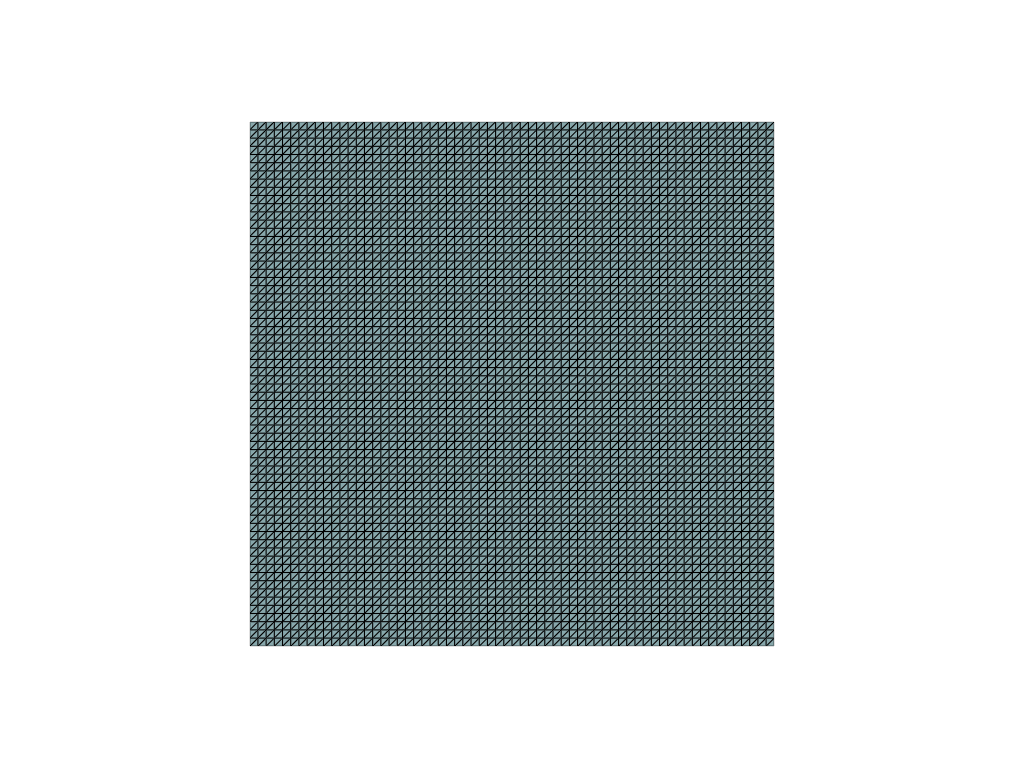

In [69]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


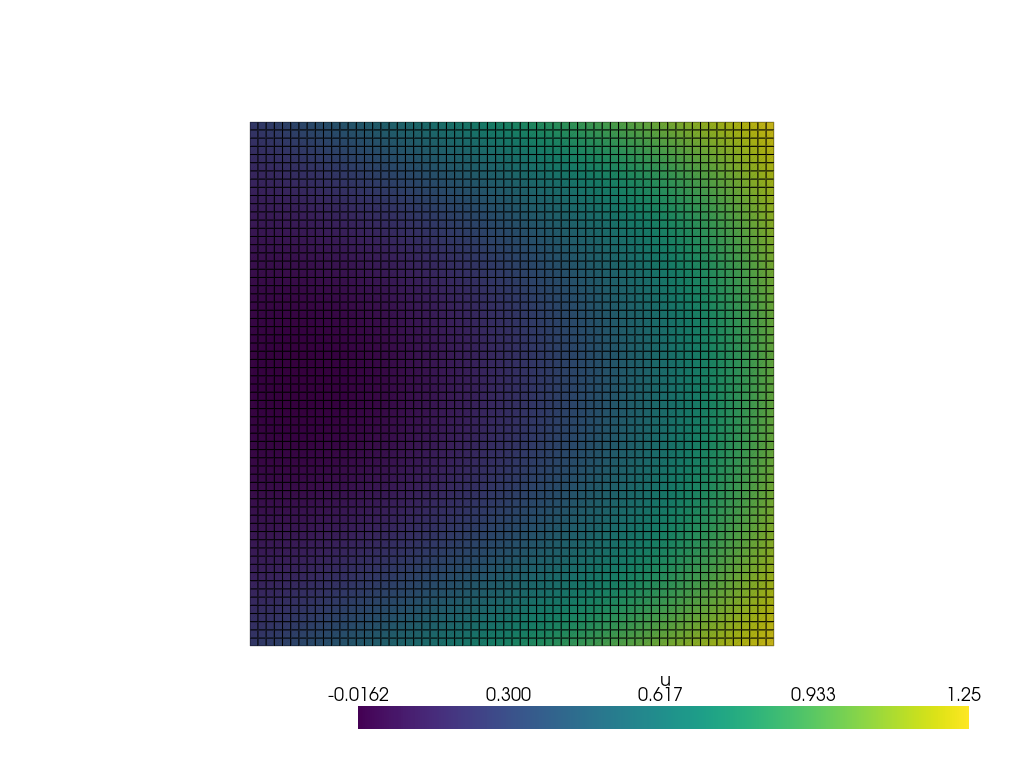

In [70]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [71]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [72]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Const_Quad_f_Const_64x64.csv")

# Dirichlet F Quadratic-Quadratic

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=(x-0.5)^2+(y-0.5)^2$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [73]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: (x[0]-0.5)**2+(x[1]-0.5)**2)

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [74]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


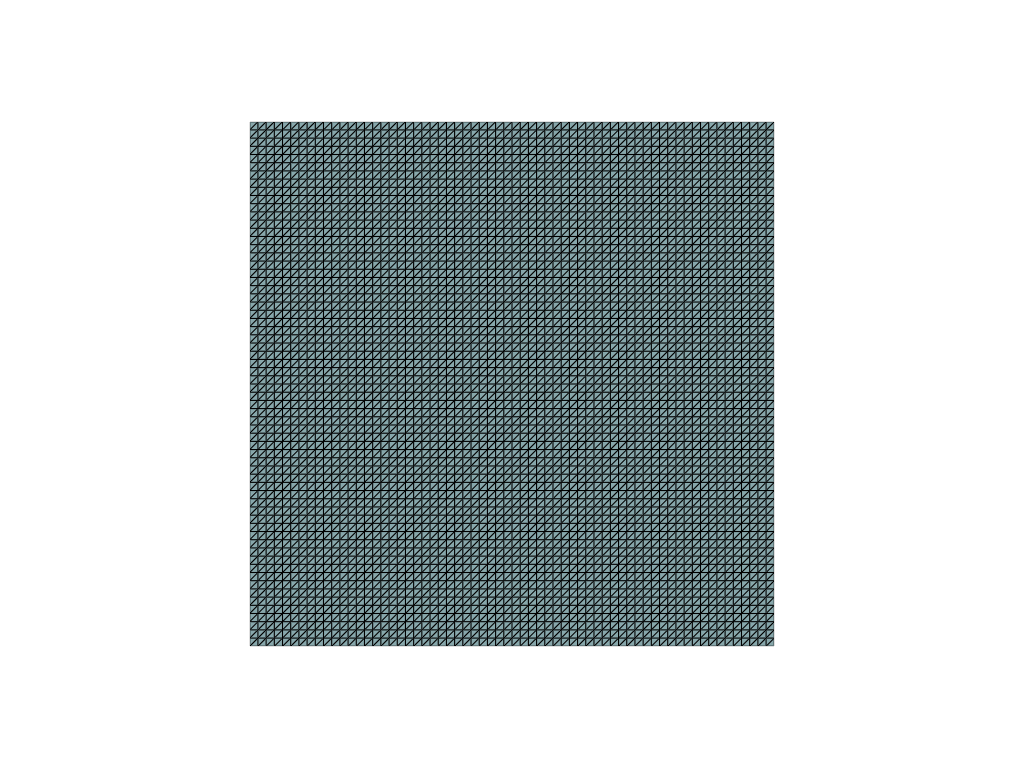

In [75]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


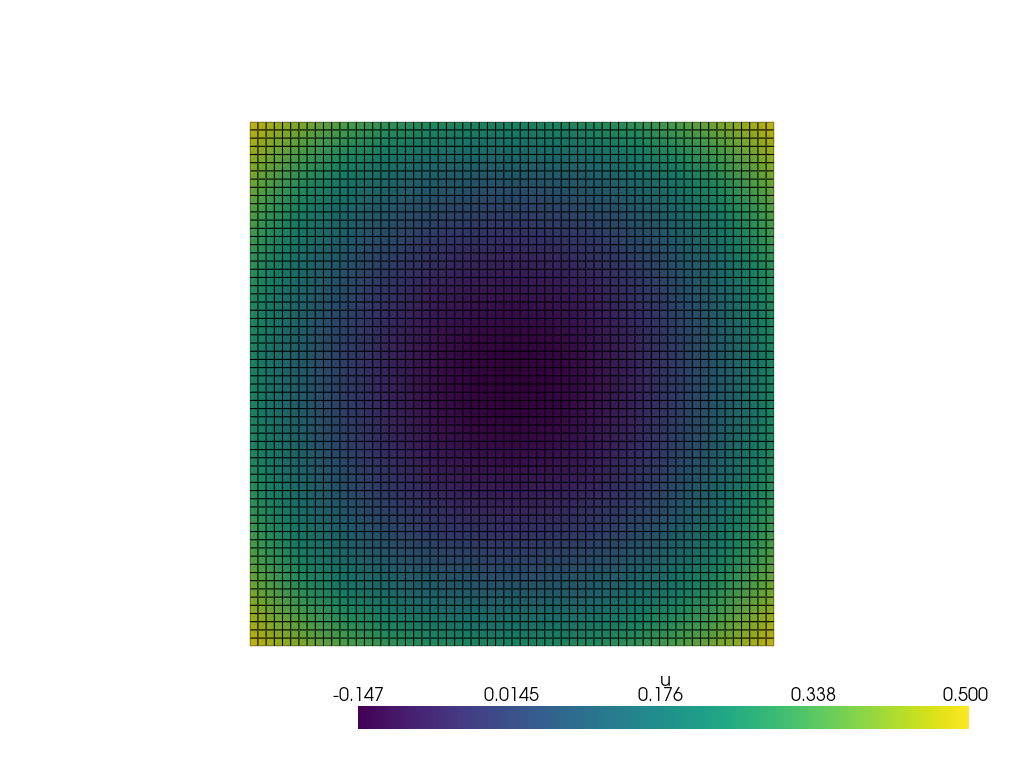

In [76]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [77]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [78]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Quad_Quad_f_Const_64x64.csv")

# Dirichlet F Exponential-Exponential

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=e^{-(x-0.5)^2} + e^{-(y-0.5)^2}$$
$$f(x,y)=-6$$


## Solution with 8x8 grid

In [82]:
from mpi4py import MPI
from dolfinx import mesh
import numpy as np
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: np.exp(-1*((x[0]-0.5)**2+(x[1]-0.5)**2)))

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)


from dolfinx import default_scalar_type
f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [83]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


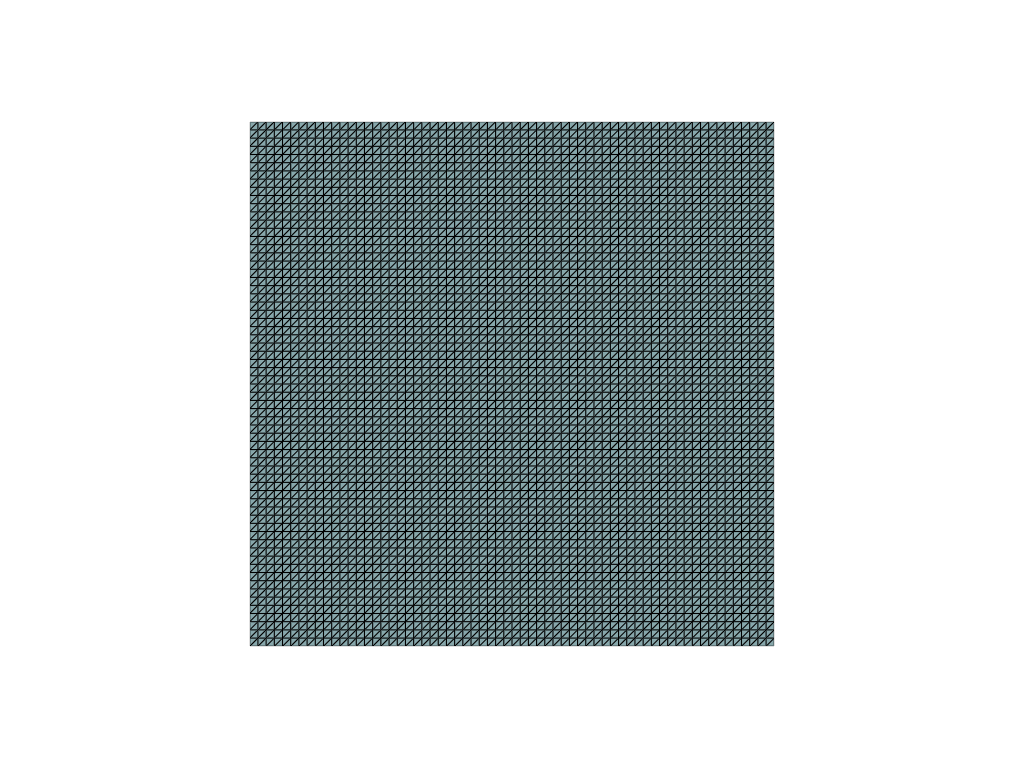

In [84]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


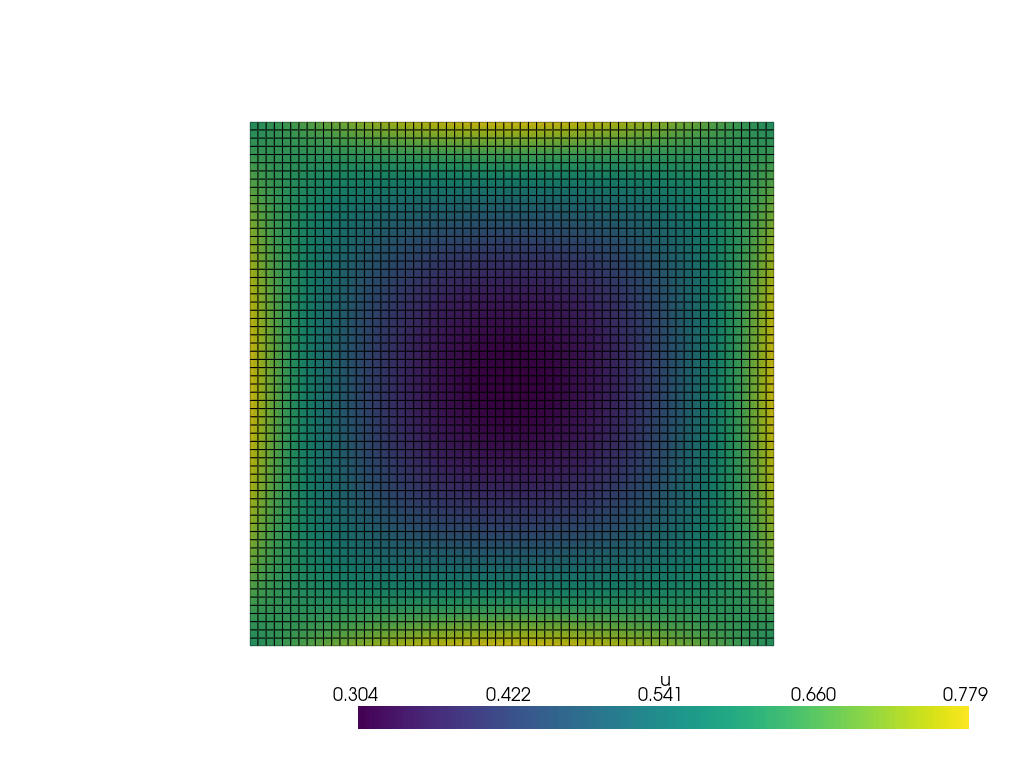

In [85]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [87]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [88]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Exp_Exp_f_Const_64x64.csv")

# Dirichlet: Exponential-Exponential - F: linear

## Equations

$$-\nabla^2 u(\mathbf{x})=f(\mathbf{x}) \ \mathbf{x} \in \Omega$$
$$u(\mathbf{x})=u_D(\mathbf{x}) \ \mathbf{x} \in \Omega$$


$$\mathbf{x}=[x,y] \ \Omega: [0,1]\times[0,1]$$

$$u_D(x,y)=e^{-(x-0.5)^2} + e^{-(y-0.5)^2}$$
$$f(x,y)=x+y$$


## Solution with 8x8 grid

In [89]:
from mpi4py import MPI
from dolfinx import mesh
import numpy as np
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: np.exp(-1*((x[0]-0.5)**2+(x[1]-0.5)**2)))

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
from ufl import Measure, SpatialCoordinate, TestFunctions, TrialFunctions, div, exp, inner
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type
x = SpatialCoordinate(domain)
f = x[0]+x[1]

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [90]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

from dolfinx import plot
pyvista.start_xvfb()
domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

static


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


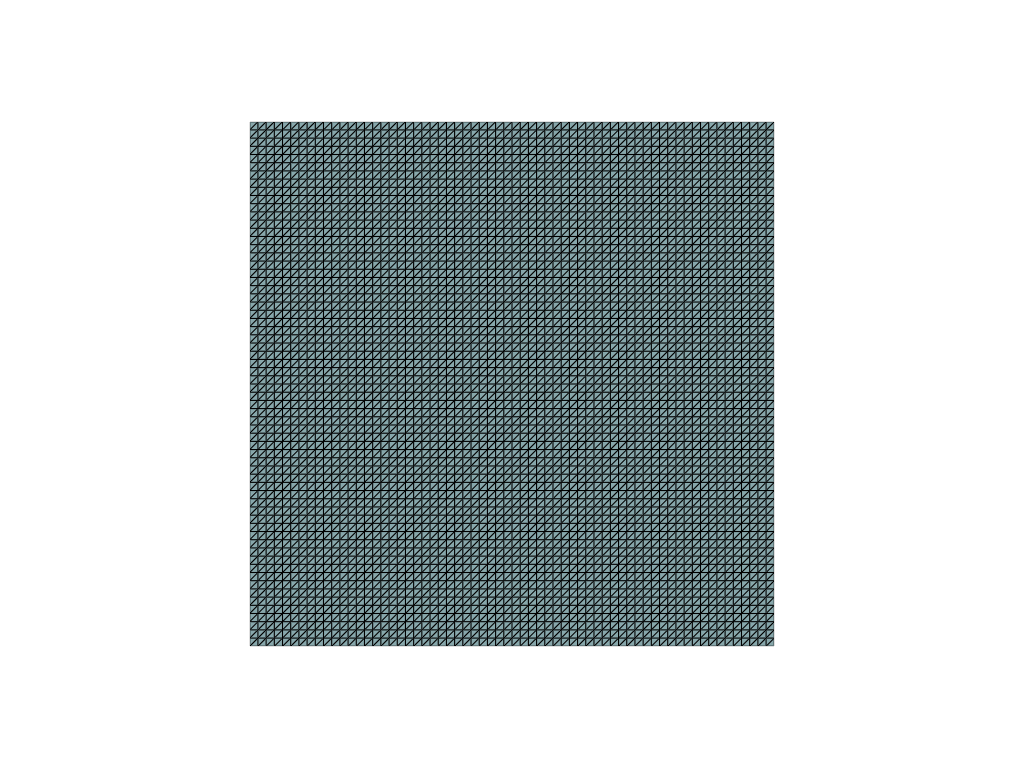

In [91]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


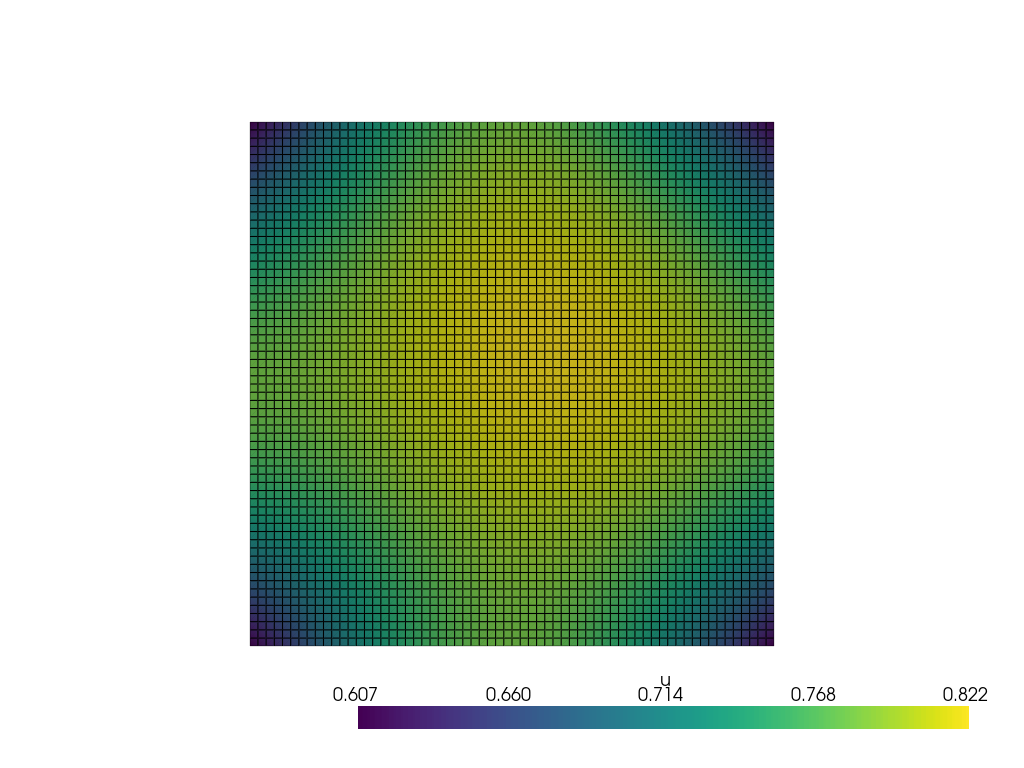

In [92]:
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

In [93]:
dd=solution_data_normalization(u=uh.x.array.real,
                            X=geometry.T,
                            t=None)



In [94]:
dd.to_csv("../Data/2D_poisson_eq_Dirichlet_Exp_Exp_f_Linear_Linear_64x64.csv")

# Boundary Conditions: Dirichlet Neumann Robin: Exponential-Exponential - F: linear

In [ ]:
from mpi4py import MPI
from dolfinx import mesh
import numpy as np
domain = mesh.create_unit_square(MPI.COMM_WORLD, 64, 64, mesh.CellType.quadrilateral)

from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

from dolfinx import fem
uD = fem.Function(V)
uD.interpolate(lambda x: np.exp(-1*((x[0]-0.5)**2+(x[1]-0.5)**2)))

import numpy
# Create facet to cell connectivity required to determine boundary facets
tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)

import ufl
from ufl import Measure, SpatialCoordinate, TestFunctions, TrialFunctions, div, exp, inner
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type
x = SpatialCoordinate(domain)
f = x[0]+x[1]

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx

from dolfinx.fem.petsc import LinearProblem
problem = LinearProblem(a, L, bcs=[bc], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()